# Feature Extraction

## Set up

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import networkx as nx

import sys
PATH = Path.cwd().parents[0]
sys.path.append(str(PATH))
from backend.utils.feature_extraction.bytecode import build_bytecode_feature_dataframe
from backend.utils.feature_extraction.transaction import build_txn_feature_dataframe
from backend.utils.feature_extraction.graph import generate_control_flow_graphs, generate_transaction_graphs, save_graph_features

## Bytecode

In [2]:
LABEL_PATH = os.path.join(PATH, 'data/labeled')
HEX_PATH = os.path.join(LABEL_PATH, 'hex')
bytecode_df, _ = build_bytecode_feature_dataframe(HEX_PATH)

invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH17
invalid instruction: PUSH16
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29


In [3]:
bytecode_df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_04,byte_36,byte_10,...,swap5,swap5 pop,swap6,swap7,timestamp,unknown_0x5f,unknown_0x5f dup1,unknown_0x5f dup1 revert,unknown_0x5f swap1,unknown_0xfe
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.676922,4.331572,0.000160,0.061938,0.028081,0.007542,0.018453,0.005777,0.001605,0.002246,...,0,0,0,0,0,0,0,0,0,2
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.012318,0.002800,0.003080,...,5,1,2,0,1,0,0,0,0,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.013469,0.003961,0.003486,...,8,0,0,0,0,1,0,0,0,1
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.010993,0.003141,0.005497,...,9,0,2,0,0,0,0,0,0,1
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.008494,0.002831,0.006876,...,17,1,6,2,5,0,0,0,0,1


In [4]:
bytecode_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0x8275ebf521dc217aa79c88132017a5bcef001dd9 to 0x17e65e6b9b166fb8e7c59432f0db126711246bc0
Columns: 1259 entries, opcode_entropy to unknown_0xfe
dtypes: float64(259), int64(1000)
memory usage: 679.2+ KB


In [5]:
bytecode_df.isnull().sum().sort_values(ascending=False)

unknown_0xfe      0
opcode_entropy    0
byte_entropy      0
byte_0x           0
byte_60           0
                 ..
byte_35           0
byte_7c           0
byte_01           0
byte_90           0
byte_63           0
Length: 1259, dtype: int64

In [6]:
bytecode_df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_04,byte_36,byte_10,...,swap5,swap5 pop,swap6,swap7,timestamp,unknown_0x5f,unknown_0x5f dup1,unknown_0x5f dup1 revert,unknown_0x5f swap1,unknown_0xfe
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.676922,4.331572,0.000160,0.061938,0.028081,0.007542,0.018453,0.005777,0.001605,0.002246,...,0,0,0,0,0,0,0,0,0,2
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.012318,0.002800,0.003080,...,5,1,2,0,1,0,0,0,0,1
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.013469,0.003961,0.003486,...,8,0,0,0,0,1,0,0,0,1
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.010993,0.003141,0.005497,...,9,0,2,0,0,0,0,0,0,1
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.008494,0.002831,0.006876,...,17,1,6,2,5,0,0,0,0,1


In [7]:
bytecode_df.to_csv(os.path.join(LABEL_PATH, 'bytecode_feature.csv'))

### Graphs

In [8]:
graphs = generate_control_flow_graphs(os.path.join(LABEL_PATH, 'hex'))

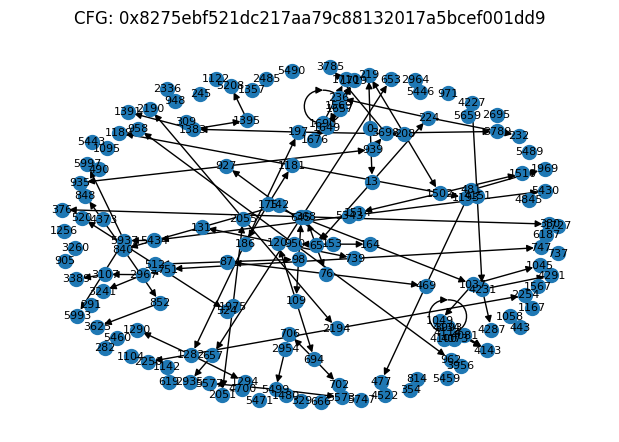

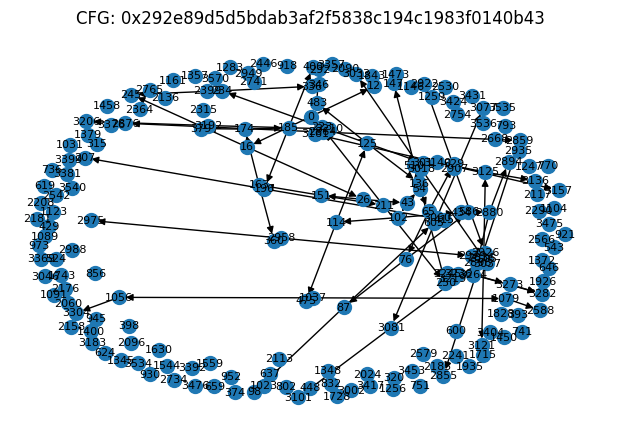

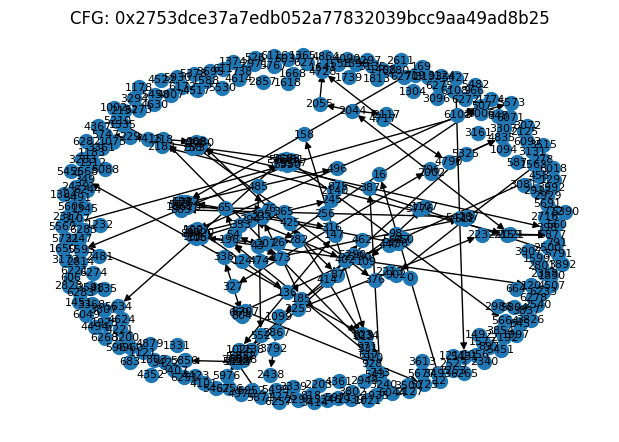

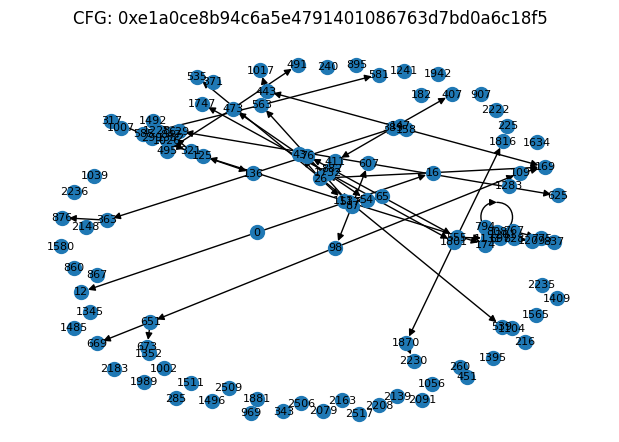

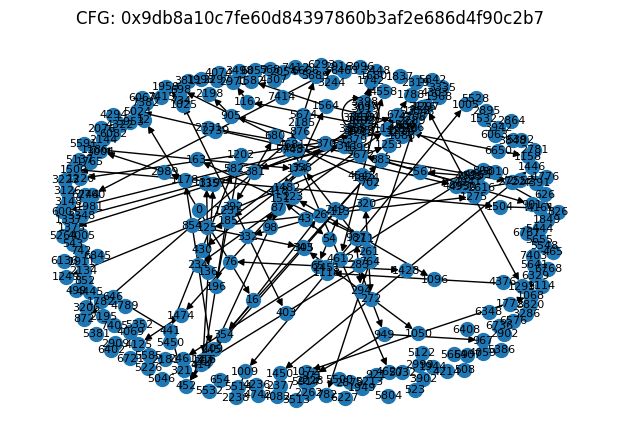

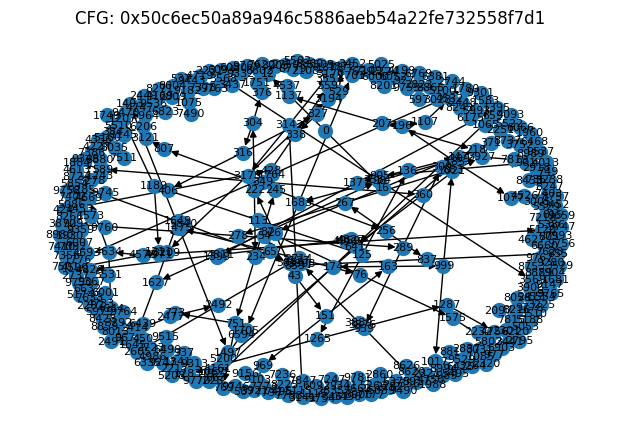

In [9]:
for i, (addr, graph) in enumerate(graphs.items()):
    plt.figure(figsize=(6, 4))
    nx.draw(graph, with_labels=True, node_size=100, font_size=8)
    plt.title(f"CFG: {addr}")
    plt.show()
    if i == 5:
        break

In [10]:
df = save_graph_features(LABEL_PATH, 'cfg', graphs)
df.head()

,num_nodes,num_edges,avg_degree,density,connected_components,avg_clustering
Address,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,155,118,1.522581,0.004943,44,0.000000
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,194,96,0.989691,0.002564,112,0.012027
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,339,178,1.050147,0.001553,192,0.003933
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,113,78,1.380531,0.006163,46,0.000000
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,303,211,1.392739,0.002306,122,0.007701


## Transaction

In [11]:
txn_df = build_txn_feature_dataframe(os.path.join(LABEL_PATH, 'txn'))

In [12]:
txn_df.head()

,txn_nums,event_nums,creation_block,creation_timestamp,start_block,end_block,life_time,start_time,end_time,duration_seconds,...,presalemint_num,changepresalestate_num,setapprovalforall_num,safetransferfrom_num,release_num,setbaseuri_num,reveal_num,createordinaltrade_num,enableordinaltrade_num,removeordinallimit_num
Address,,,,,,,,,,,,,,,,,,,,,
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,1,2,16832271,1678870799,16832271,16832271,0,1678870799,1678870799,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xba751bff276907c438e927d2c2f18de574195e4b,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f,15,65,18559580,1699837391,18559580,18567687,8107,1699837391,1699935287,97896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
txn_df.isnull().sum().sort_values(ascending=False)

removeordinallimit_num    0
txn_nums                  0
maxtxamountupdated_num    0
removelimits_num          0
transferenabled_num       0
                         ..
end_block                 0
life_time                 0
start_time                0
end_time                  0
duration_seconds          0
Length: 98, dtype: int64

In [14]:
txn_df.to_csv(os.path.join(LABEL_PATH, 'transaction_feature.csv'))

### Graphs

In [15]:
graphs = generate_transaction_graphs(os.path.join(LABEL_PATH, 'txn'))

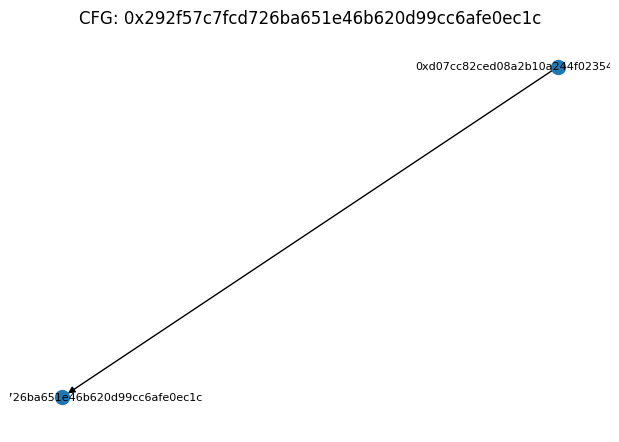

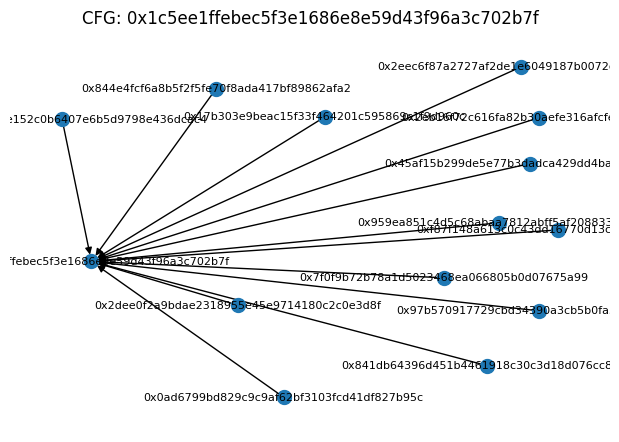

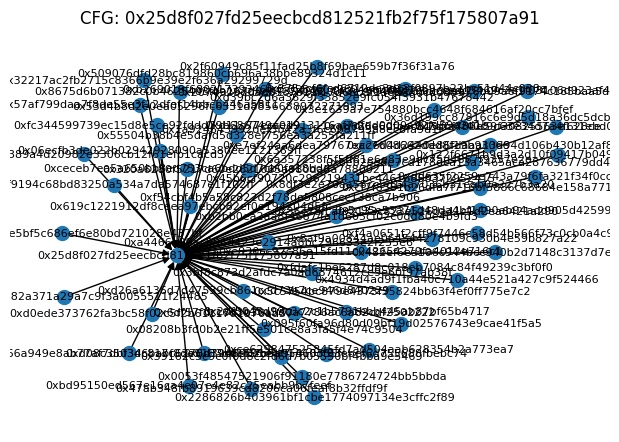

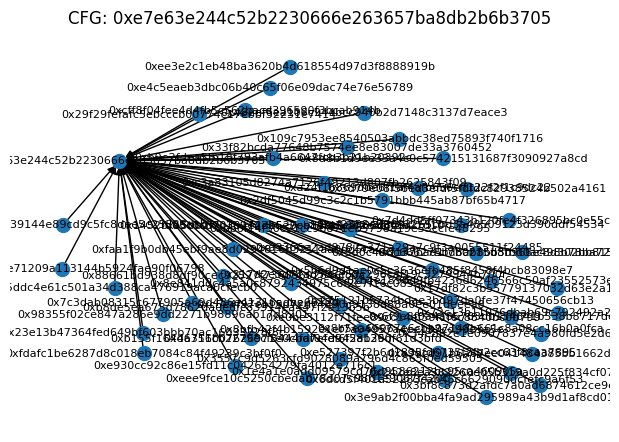

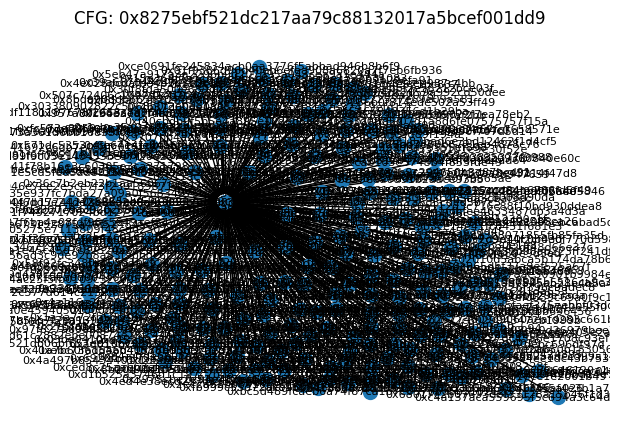

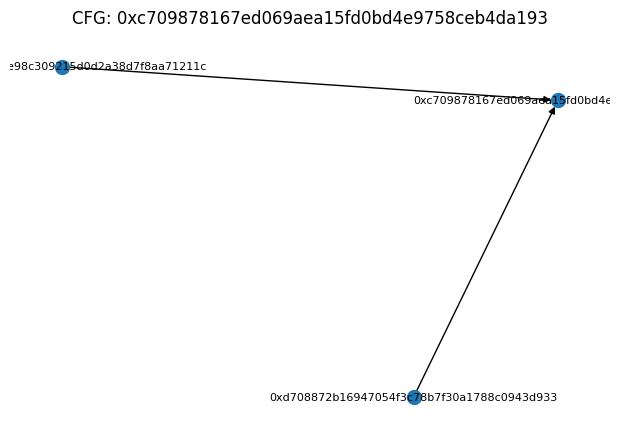

In [16]:
for i, (addr, graph) in enumerate(graphs.items()):
    plt.figure(figsize=(6, 4))
    nx.draw(graph, with_labels=True, node_size=100, font_size=8)
    plt.title(f"CFG: {addr}")
    plt.show()
    if i == 5:
        break

In [17]:
df = save_graph_features(LABEL_PATH, 'txn', graphs)
df.head()

,num_nodes,num_edges,avg_degree,density,connected_components,avg_clustering
Address,,,,,,
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,2,1,1.000000,0.500000,1,0.0
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f,14,13,1.857143,0.071429,1,0.0
0x25d8f027fd25eecbcd812521fb2f75f175807a91,66,65,1.969697,0.015152,1,0.0
0xe7e63e244c52b2230666e263657ba8db2b6b3705,57,56,1.964912,0.017544,1,0.0
0x8275ebf521dc217aa79c88132017a5bcef001dd9,253,252,1.992095,0.003953,1,0.0
